<h1><b>Student Segmentation Clustering</b></h1>
<hr></hr>
<h5>Name: Shaun Kwo Rui Yu</br>
Class: DAAA/FT/1B06</br>
Admin No.: 2317933</h5>
<hr></hr>


<h5><b>Objectives:</b></h5>
<ol>
    <li>Analyse the dataset `Student_Performance_dataset.csv` with 1000 students' information.</li>
    <li>Group students into clusters to cater to their specific needs.</li>
    <li>Identify groups of students requiring more attention.</li>
</ol>

<h3><b>Background Information:</b></h3>
In education, the focus is on enhancing the learning experience and academic outcomes for students. A sample of 1000 students' data such as age, gender, and subject scores provides a valuable resource for understanding diverse learning needs. The goal is not only to categorize students into clusters but to help students achieve their acedamic goals and also make more personalized and enriching academic experience.

It is also <b>interesting to note</b> that since there is <b>so many different types of genders</b>, this datasets is most probably <b>an american dataset</b></p>

<h5><b>Additional Notes:</b></h5>
<p>Consider the changing landscape of education and the importance of adapting to students' diverse needs.</p>

<h5><b>Steps in the Project:</b></h5>
<ol>
    <li><b>Step 1: Understanding the Dataset</b>
        <ol>
            <li>1.1 Load the Dataset:
                <ul>
                    <li>Import the necessary libraries (pandas, scikit-learn).</li>
                    <li>Load the dataset 'Student_Performance_dataset.csv'.</li>
                </ul>
            </li>
            <li>1.2 Exploratory Data Analysis (EDA):
                <ul>
                    <li>Explore the structure of the dataset (columns, data types).</li>
                    <li>Check for missing values and handle them if necessary.</li>
                    <li>Visualize key features to understand student distribution.</li>
                </ul>
            </li>
        </ol>
    </li>
    <li><b>Step 2: Background Research & Data Exploration (10 marks)</b>
        <ol>
            <li>2.1 Data Exploration:
                <ul>
                    <li>Visualize the distribution of age, gender, and subject scores.</li>
                    <li>Identify any patterns or trends in the student data.</li>
                </ul>
            </li>
        </ol>
    </li>
    <li><b>Step 3: Feature Engineering (10 marks)</b>
        <ol>
            <li>3.1 Preprocess Data:
                <ul>
                    <li>Handle categorical features (e.g., gender) using encoding.</li>
                    <li>Standardize numerical features (e.g., age, scores) for uniformity.</li>
                </ul>
            </li>
        </ol>
    </li>
    <li><b>Step 4: Modelling and Evaluation (10 marks)</b>
        <ol>
            <li>4.1 Build Initial Model:
                <ul>
                    <li>Apply k-means clustering algorithm to the preprocessed data.</li>
                    <li>Examine the resulting clusters and their characteristics.</li>
                </ul>
            </li>
            <li>4.2 Evaluate Initial Model:
                <ul>
                    <li>Assess the performance of the model based on relevant metrics.</li>
                    <li>Consider silhouette score or other clustering evaluation metrics.</li>
                </ul>
            </li>
        </ol>
    </li>
    <li><b>Step 5: Model Improvement (10 marks)</b>
        <ol>
            <li>5.1 Experiment with k:
                <ul>
                    <li>Test the clustering algorithm with different values of k.</li>
                    <li>Explore the impact of changing the number of clusters.</li>
                </ul>
            </li>
            <li>5.2 Refinement:
                <ul>
                    <li>Adjust hyperparameters or preprocessing steps based on evaluation results.</li>
                    <li>Reevaluate the model's performance after refinement.</li>
                </ul>
            </li>
        </ol>
    </li>
</ol>




<hr></hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans

<hr></hr>
<h3>Loading Dataset</h3>
<hr></hr>

In [23]:
# Loading the dataset
df=pd.read_csv('./CA2 Datasets/Student_Performance_dataset.csv')
print(df)

# Set Student_ID as index 
df.set_index('Student_ID', inplace=True)
df.head(10)

     Student_ID       Gender  Age  English_Score  Math_Score  Science_Score
0             1       Female   18           64.0        56.0             60
1             2       Female   12           89.0        71.0             97
2             3       Female   18           69.0        69.0             80
3             4       Female   17           60.0        72.0             97
4             5         Male   13           71.0        76.0             76
..          ...          ...  ...            ...         ...            ...
995         996       Female   14           64.0        55.0             77
996         997  Genderqueer   14           66.0        60.0             56
997         998         Male   16           82.0        81.0             74
998         999         Male   14           76.0        62.0             62
999        1000       Female   16           77.0        97.0             60

[1000 rows x 6 columns]


,Gender,Age,English_Score,Math_Score,Science_Score
Student_ID,,,,,
1,Female,18,64.0,56.0,60
2,Female,12,89.0,71.0,97
3,Female,18,69.0,69.0,80
4,Female,17,60.0,72.0,97
5,Male,13,71.0,76.0,76
6,Female,12,83.0,61.0,60
7,Female,12,68.0,73.0,93
8,Female,18,84.0,84.0,79
9,Female,14,94.0,71.0,94


<hr></hr>
<h3>Exploratory Data Analysis</h3>
<hr></hr>
This dataset contains 1000 rows of data with 5 columns, exluding Student_ID.

The main focus will be to finding out how features like age and gender may affect the results of each subject the student takes and predict the the results of each subject of a student
<ul>
<li><b>Gender:</b> Student's gender</li>
<li><b>Age:</b> Student's age</li>
<li><b>English_Score:</b> Student's English marks</li>
<li><b>Math_Score:</b> Student's Mathematics marks</li>
<li><b>Science_Score:</b> Student's Science marks</li>
</ul>

In [24]:
# Display basic statistics about the dataset
df.shape
df.info()
df.head()

# Explore statistical properties of the time series data
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Age            1000 non-null   int64  
 2   English_Score  971 non-null    float64
 3   Math_Score     967 non-null    float64
 4   Science_Score  1000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 46.9+ KB


,Age,English_Score,Math_Score,Science_Score
count,1000.000000,971.000000,967.000000,1000.000000
mean,14.970000,76.089598,76.660807,76.370000
std,1.959832,12.767113,12.541226,12.866649
min,12.000000,55.000000,55.000000,55.000000
25%,13.000000,65.000000,66.000000,65.000000
50%,15.000000,76.000000,76.000000,77.000000
75%,17.000000,88.000000,87.500000,87.000000
max,18.000000,98.000000,98.000000,98.000000


In [25]:
# Checking row for missing values
print(f"The number of missing value for each column is \n{df.isnull().sum()}")

# Checking for Duplicated values
print(f"\nThe number of rows with duplicated data is {df.duplicated().sum()}")

# Checking for rows with more than one missing value
indices_more_than_one_null = df[df.isnull().sum(axis=1) > 1].index
print(f"\nThe rows with 2 or more data missing are {indices_more_than_one_null.tolist()}")



The number of missing value for each column is 
Gender            0
Age               0
English_Score    29
Math_Score       33
Science_Score     0
dtype: int64

The number of rows with duplicated data is 0

The rows with 2 or more data missing are [57, 189]


<b><u>Observations</u></b>

<ul>
<li>The shape of the dataset is (1000,5) whereby there is 1000 observations and 5 features </li>
<li>Datatypes of all features are numerical except Gender</li>
<li>There are 29 missing values for English_Score and 33 missing values for Math_Score,

 data imputation would be done later</li>
<li>There are no students with the same English_Score, Math_Score and Science_Score</li>
</ul>

<hr></hr>
<h4>Feature Engineering (Imputing missing data)</h4>
<hr></hr>

In [26]:
# Peforming linear interpolation
df.interpolate(method='linear', inplace=True)

<h4>Univariate Analysis</h4>
<hr></hr>
Analysing distribution of each variable

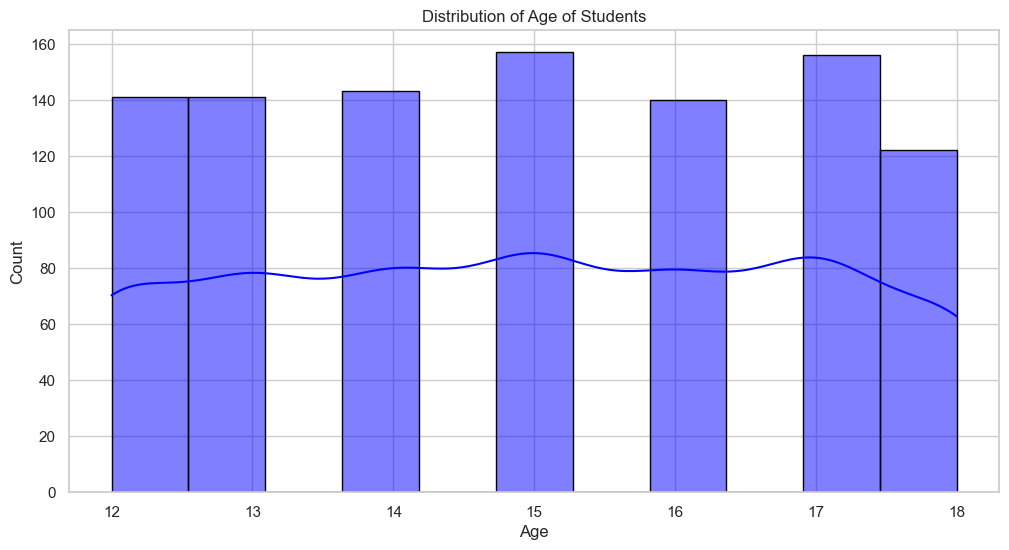

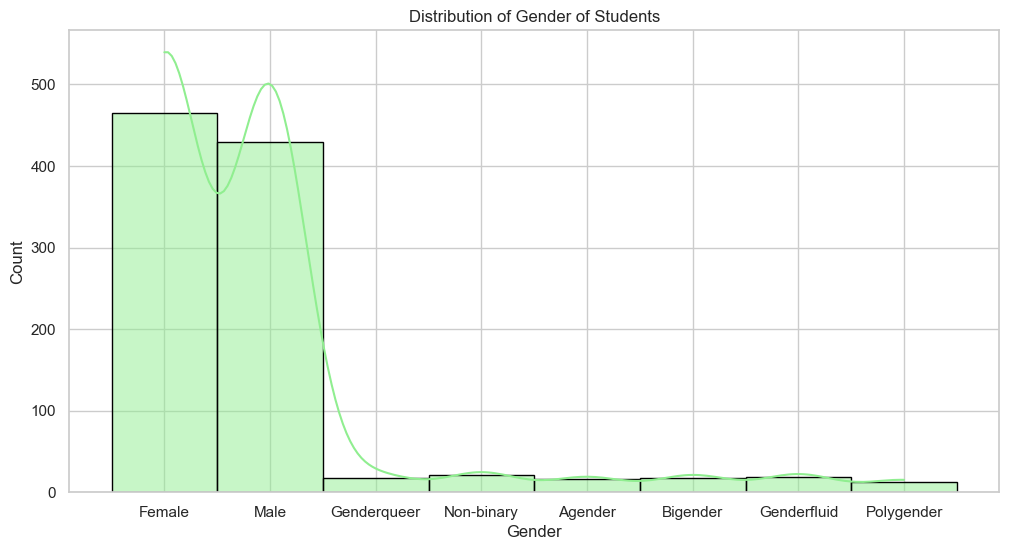

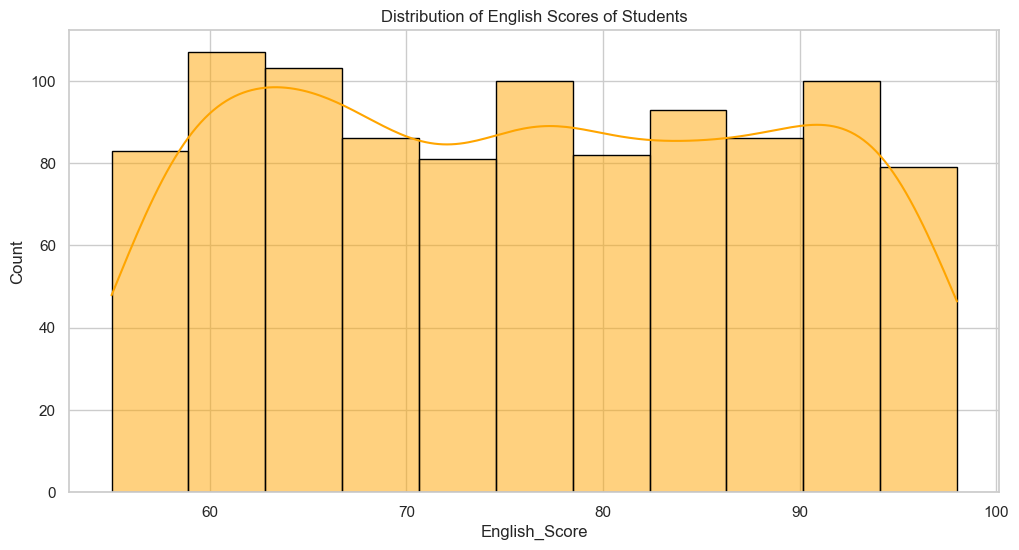

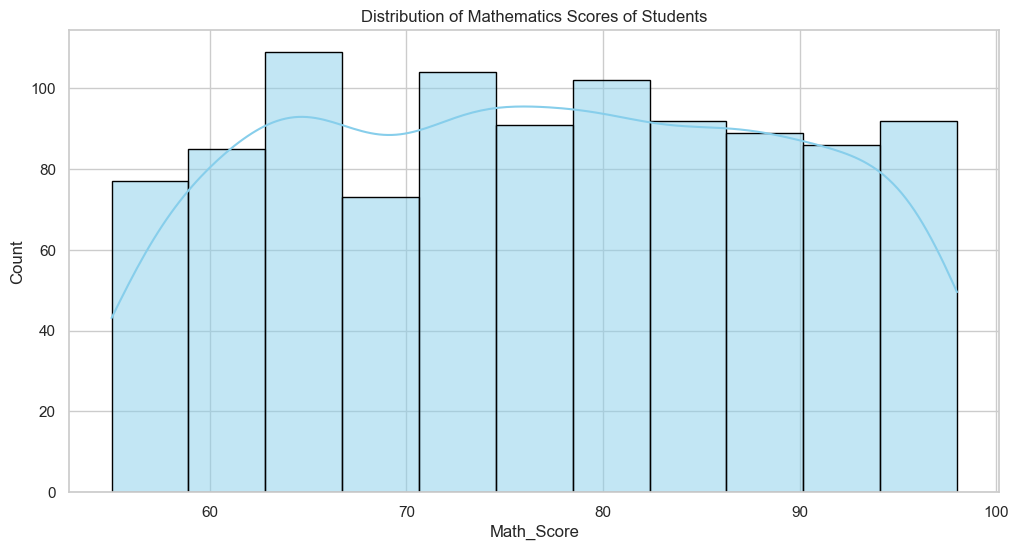

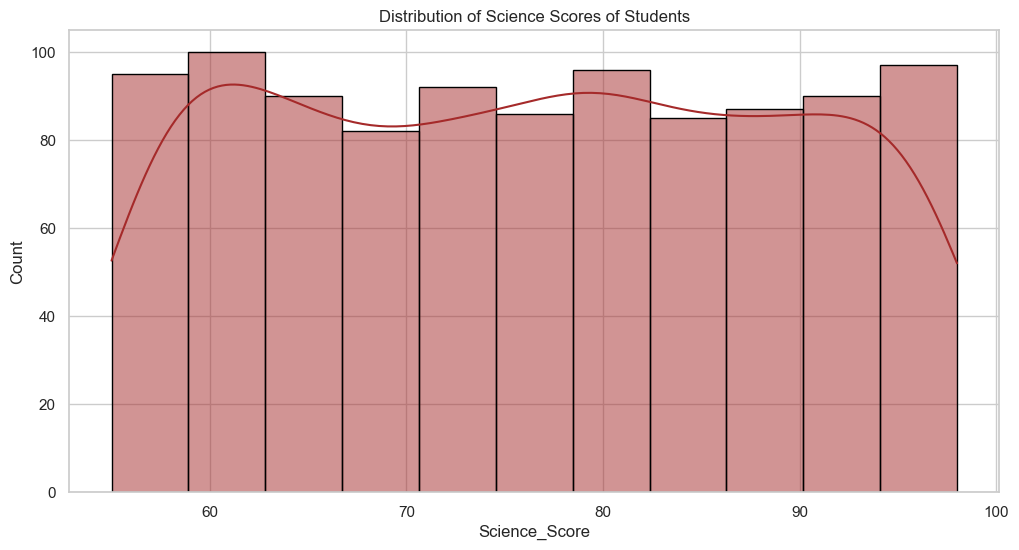

In [27]:
sns.set(style="whitegrid")

# Plot histogram for these Age, Gender and subject scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], color='blue', edgecolor='black', kde=True)
plt.title('Distribution of Age of Students')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Gender'], color='lightgreen', edgecolor='black', kde=True)
plt.title('Distribution of Gender of Students')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['English_Score'], color='orange', edgecolor='black', kde=True)
plt.title('Distribution of English Scores of Students')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Math_Score'], color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Mathematics Scores of Students')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['Science_Score'], color='brown', edgecolor='black', kde=True)
plt.title('Distribution of Science Scores of Students')
plt.ylabel('Count')
plt.show()

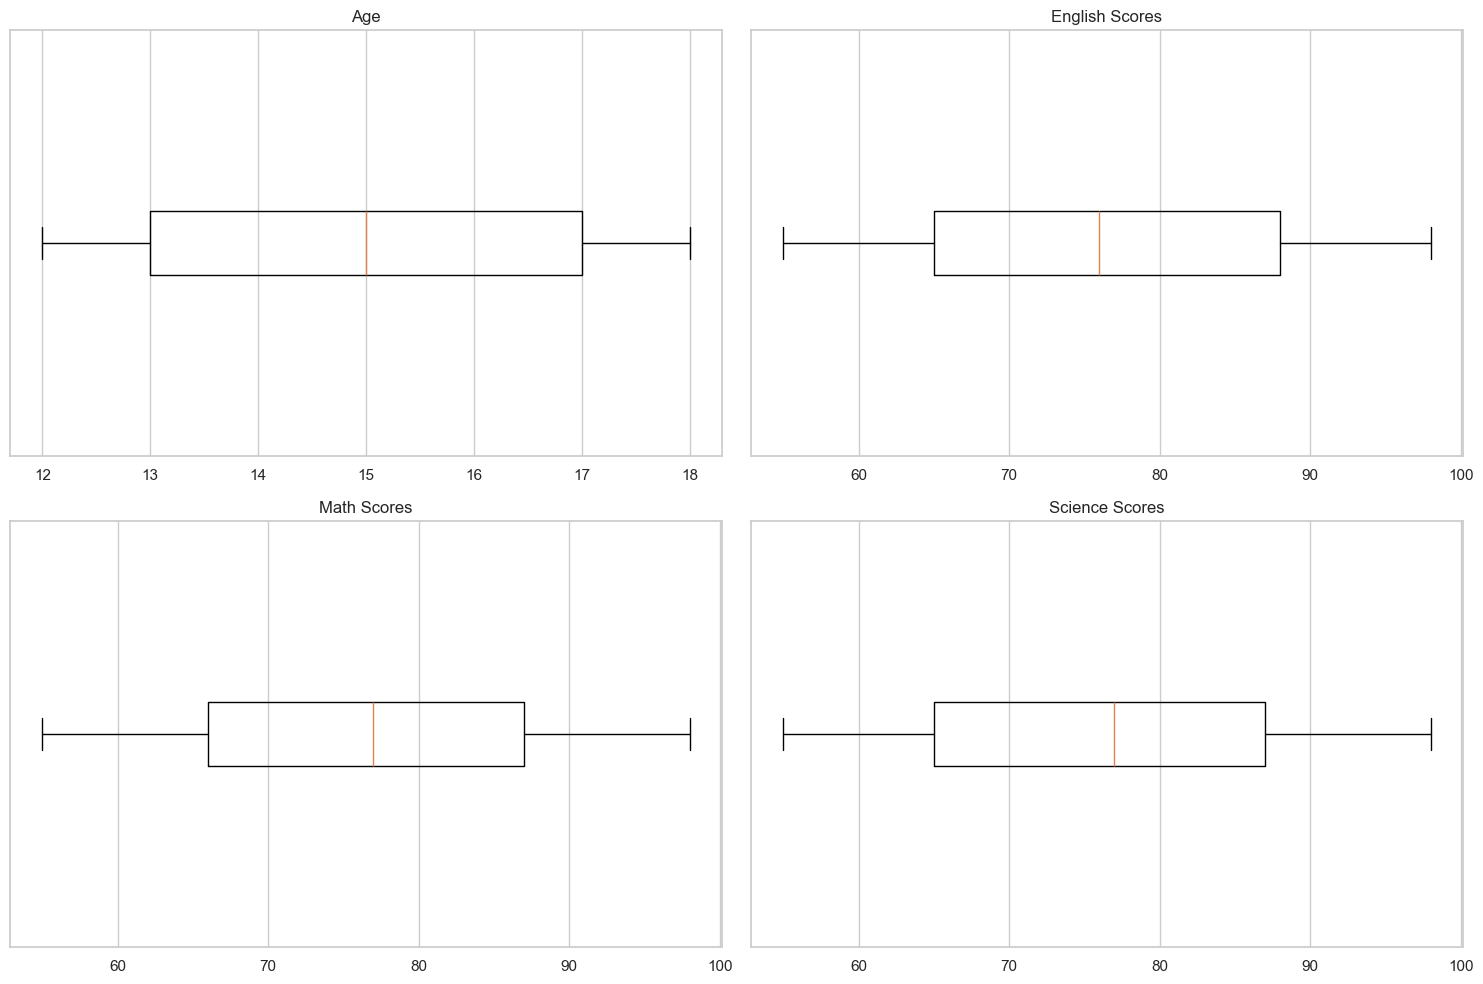

In [28]:
# Create boxplots
plt.figure(figsize=(15, 10))

# Age
plt.subplot(2, 2, 1)
plt.boxplot(df['Age'], vert=False)
plt.title('Age')
plt.yticks([])

# English Scores
plt.subplot(2, 2, 2)
plt.boxplot(df['English_Score'], vert=False)
plt.title('English Scores')
plt.yticks([])

# Math Scores
plt.subplot(2, 2, 3)
plt.boxplot(df['Math_Score'], vert=False)
plt.title('Math Scores')
plt.yticks([])

# Science Score
plt.subplot(2, 2, 4)
plt.boxplot(df['Science_Score'], vert=False)
plt.title('Science Scores')
plt.yticks([])

plt.tight_layout()
plt.show()


<b><u>Observation:</u></b>


No anomalies are found for Age and scores

<h4>Bivariate Analysis of categorical data</h4>
<hr></hr>
Analysing the relationships between the categorical variables.

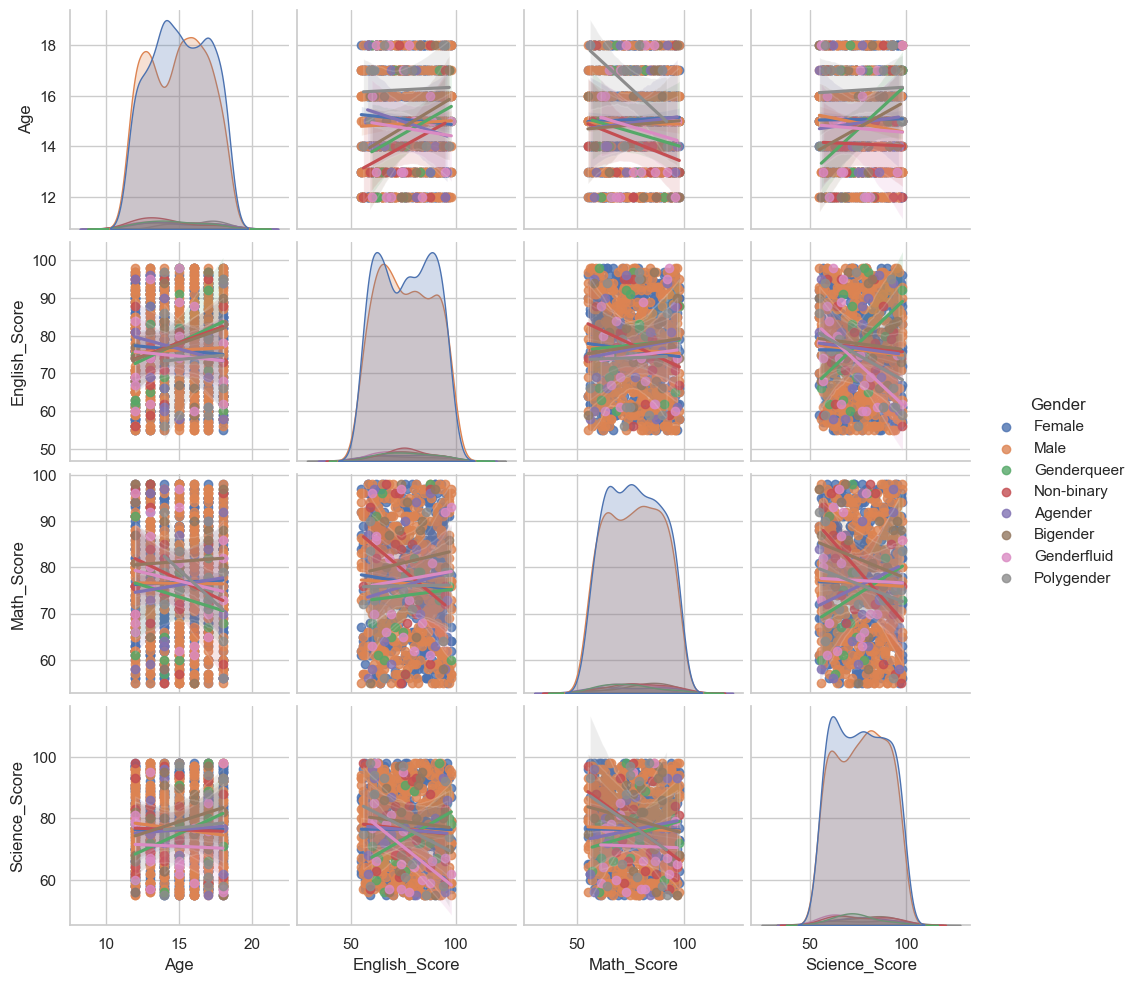

In [29]:
sns.pairplot(df, kind='reg', hue='Gender')
plt.show()

# The pairplot is too messy, except for the diagonal graphs
# which shows how each gender performs at each subject, although quite unclear.

<hr></hr>
<h3>Data Preprocessing/ Feature Engineering</h3>
<hr></hr>
3 stages of preprocessing: 

1. <b>Standard Scaler</b> scales the data to have a mean of 0 and standard deviation of 1.</li>
$$z = \frac{{X - \text{mean}(X)}}{{\text{std}(X)}} 



2. <b>One-hot Encoding Categorical data</b> --> Gender

3. Checking if presence of categorical data really affects the "k" value

<h4>1. Standard Scaler</h4>
<hr>

In [30]:
# Initialize the scaler
scaler = StandardScaler()
df1=df.copy()
# Fit and transform the dataframe except gender
df1[['Age', 'English_Score', 'Math_Score', 'Science_Score']] = scaler.fit_transform(df[['Age', 'English_Score', 'Math_Score', 'Science_Score']])

# Display the updated DataFrame
print(df1.head())

            Gender       Age  English_Score  Math_Score  Science_Score
Student_ID                                                            
1           Female  1.546825      -0.963643   -1.670011      -1.272918
2           Female -1.516194       1.013629   -0.460939       1.604172
3           Female  1.546825      -0.568189   -0.622148       0.282266
4           Female  1.036321      -1.280007   -0.380334       1.604172
5             Male -1.005691      -0.410007   -0.057915      -0.028771


<h4>2. One Hot Encoding</h4>
<hr>


In [31]:
# One Hot Encoding for Gender
df_encoded = pd.get_dummies(df1, drop_first=True)
df_encoded.head(10)

,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
Student_ID,,,,,,,,,,,
1,1.546825,-0.963643,-1.670011,-1.272918,False,True,False,False,False,False,False
2,-1.516194,1.013629,-0.460939,1.604172,False,True,False,False,False,False,False
3,1.546825,-0.568189,-0.622148,0.282266,False,True,False,False,False,False,False
4,1.036321,-1.280007,-0.380334,1.604172,False,True,False,False,False,False,False
5,-1.005691,-0.410007,-0.057915,-0.028771,False,False,False,False,True,False,False
6,-1.516194,0.539083,-1.266987,-1.272918,False,True,False,False,False,False,False
7,-1.516194,-0.647280,-0.299729,1.293136,False,True,False,False,False,False,False
8,1.546825,0.618174,0.586924,0.204507,False,True,False,False,False,False,False
9,-0.495188,1.409083,-0.460939,1.370895,False,True,False,False,False,False,False


<h5>3. Checking if presence of categorical data really affects k-means</h5>
<hr>

                 Age  English_Score  Math_Score  Science_Score
Student_ID                                                    
1           1.546825      -0.963643   -1.670011      -1.272918
2          -1.516194       1.013629   -0.460939       1.604172
3           1.546825      -0.568189   -0.622148       0.282266
4           1.036321      -1.280007   -0.380334       1.604172
5          -1.005691      -0.410007   -0.057915      -0.028771
...              ...            ...         ...            ...
996        -0.495188      -0.963643   -1.750615       0.048988
997        -0.495188      -0.805461   -1.347591      -1.583955
998         0.525818       0.459993    0.345109      -0.184289
999        -0.495188      -0.014553   -1.186382      -1.117400
1000        0.525818       0.064538    1.634786      -1.272918

[1000 rows x 4 columns]


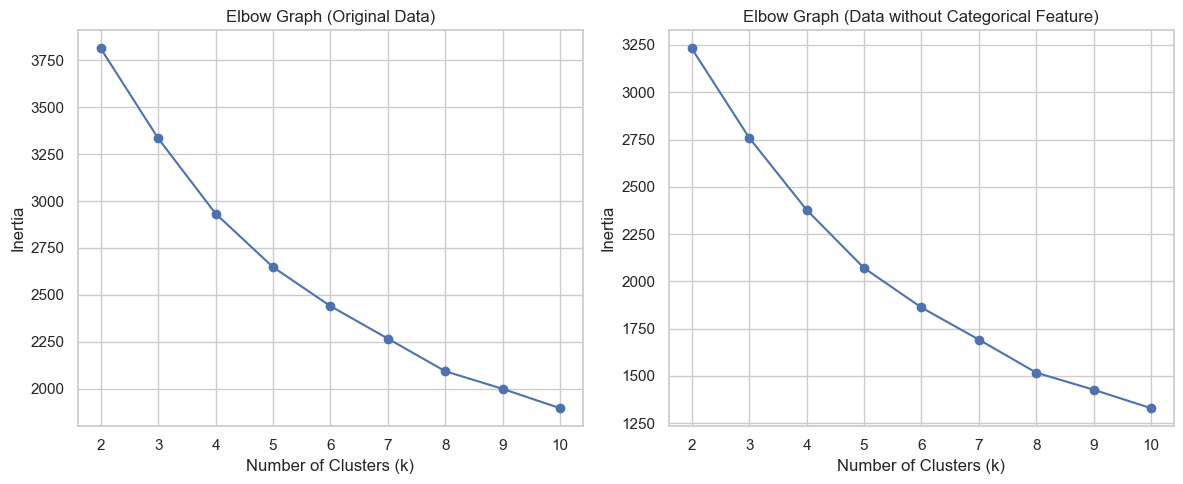

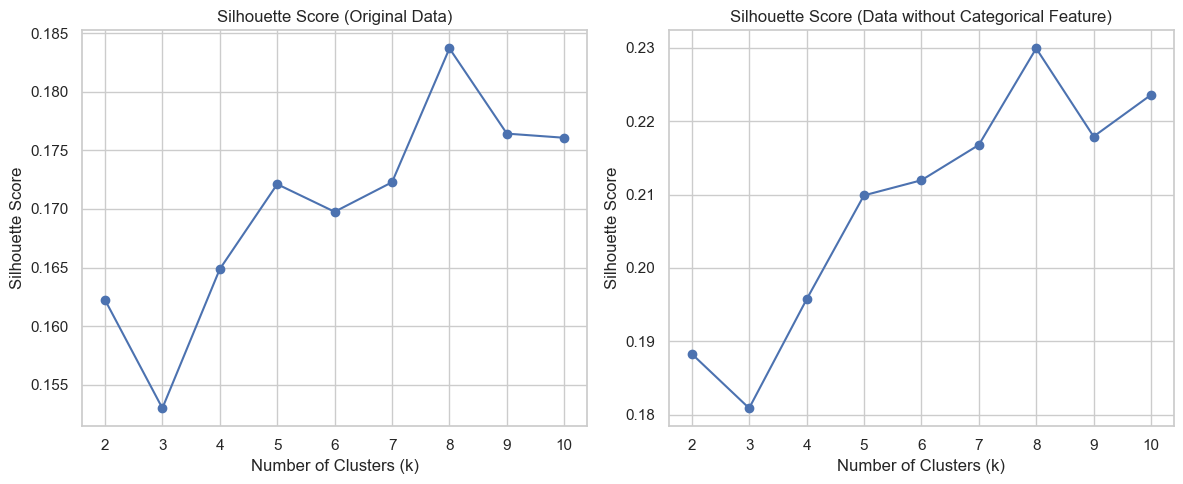

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

# Drop categorical data (Gender)
df_no_categorical = df1.drop(columns=['Gender'])
print(df_no_categorical)

# Define a function to calculate inertia and silhouette score for a given k
def calculate_metrics(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    pipeline = make_pipeline(kmeans)
    labels = pipeline.fit_predict(data)
    inertia = kmeans.inertia_
    silhouette = silhouette_score(data, labels)
    return inertia, silhouette

inertia_values_original = []
silhouette_values_original = []
inertia_values_no_categorical = []
silhouette_values_no_categorical = []

# Calculate metrics for each k value -> 2 -10 groups clustering
for k in range(2, 11):
    inertia_original, silhouette_original = calculate_metrics(df_encoded, k)
    inertia_no_categorical, silhouette_no_categorical = calculate_metrics(df_no_categorical, k)

    inertia_values_original.append(inertia_original)
    silhouette_values_original.append(silhouette_original)
    inertia_values_no_categorical.append(inertia_no_categorical)
    silhouette_values_no_categorical.append(silhouette_no_categorical)

# Plot the elbow graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2,11), inertia_values_original, marker='o')
plt.title('Elbow Graph (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2,11), inertia_values_no_categorical, marker='o')
plt.title('Elbow Graph (Data without Categorical Feature)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Plot silhouette score graph
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2,11), silhouette_values_original, marker='o')
plt.title('Silhouette Score (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(range(2,11), silhouette_values_no_categorical, marker='o')
plt.title('Silhouette Score (Data without Categorical Feature)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


<b><u>Observations</u></b>
<ul>
<b>Both these 2 factors below would make <u>future predictions more inaccurate</u></b>
<li>For original data, inertia is greater as compared to data after categorical data (gender) is removed. </li>
<li>For original data, Silhouette Score is lower as compared to data after categorical data (gender) is removed.</li>

<b>As both the inertia and Silhouette Score shows that dataset without categorical data is better than the original data, so we would be using <u>dataset without categorical data</u> which means gender taken into account anymore</b>
<b>Hence we would be using the dataset without categorical data from here onwards...</b>
</ul>

<hr></hr>
<h4>Building Clustering Models</h4>
<hr></hr>

<h5>Here are some clustering algorithms that are commonly used for numerical data: </h5>
<ol>
<li><b>K-Means Clustering</b></li>
Assigns data points to clusters based on the mean of nearby points
<li><b>Spectral Clustering</b></li>
Spectral clustering partitions data using eigenvectors of an affinity matrix, capturing complex structures and handling non-convex shapes effectively.
<li><b>Aggrolomative Clustering</b></li>
Builds a hierarchy of clusters by either merging or splitting existing clusters based on their similarity.
<li><b>DBSCAN</b></li>
DBSCAN identifies clusters based on data density, robust to outliers.
</ol>

<h4>K-Means Clustering</h4>
<hr></hr>
K-Means split the data points into k number of groups with data points close to the centroid being in the group.

The 2 processes below show how to find the best k-value

<b>Elbow Method using inertia</b>
Inertia is calculated using the formula below:
$$\text{Inertia} = \sum^m*{i=1}||x^{(i)}-\mu*{c^{(i)}}||^2_2 $$

- $m$ : Number of Datapoints
- $x^{(i)}$ : i-th Datapoints
- $\mu_{c^{(i)}}$ : Cluster Centroids for i-th Datapoints

Text(0, 0.5, 'Inertia')

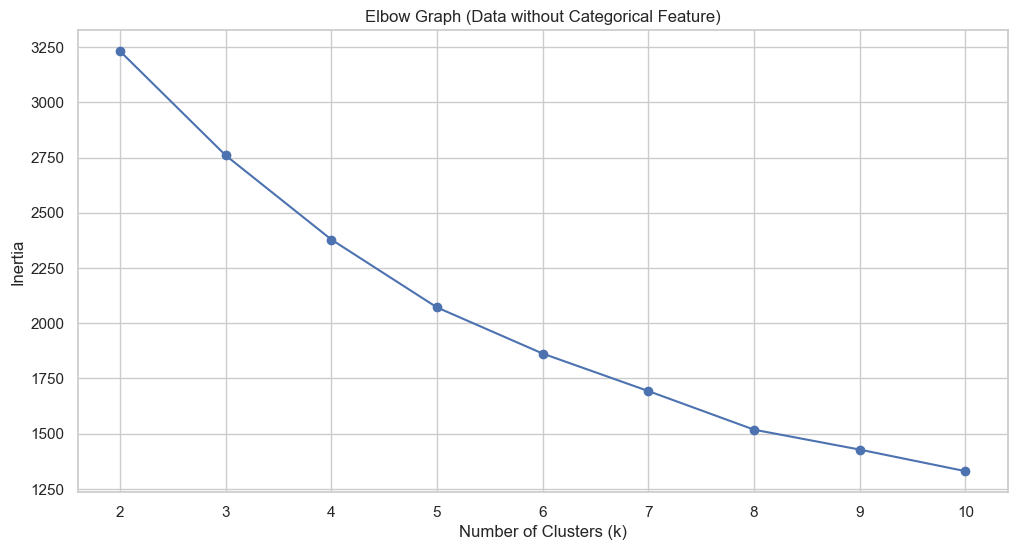

In [33]:
plt.figure(figsize=(12,6))
plt.plot(range(2,11), inertia_values_no_categorical, marker='o')
plt.title('Elbow Graph (Data without Categorical Feature)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

<b><u>Observations</u></b>

<ul>
<li>Inertia seems to decrease uniformly when k increase</li>
<li>A steep gradient in the inertia on the elbow graph suggests a significant reduction in intra-cluster variance. And the gradients for inertia in elbow graph are steeper when k-cluster are 4 and 5 </li>
<li>The results are rather ambigious, and there is no clear k value to be chosen as there is no clear elbow</li>
</ul>

<h4>Silhouette Score</h4>
<hr></hr>
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score around 0 indicates overlapping clusters

Text(0, 0.5, 'Silhouette Score')

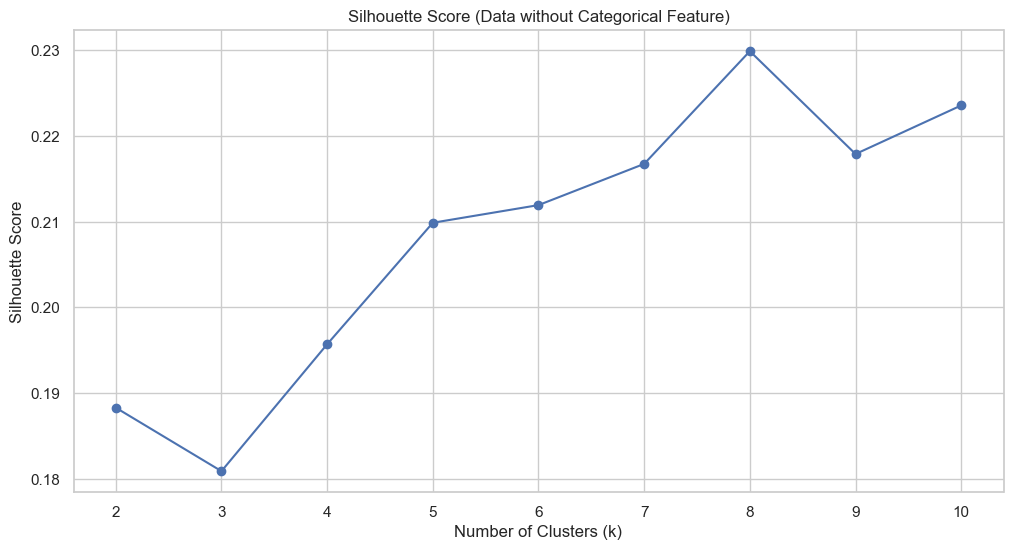

In [34]:
plt.figure(figsize=(12,6))
plt.plot(range(2,11), silhouette_values_no_categorical, marker='o')
plt.title('Silhouette Score (Data without Categorical Feature)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

<b><u>Observations</u></b>

<ul>
<li>Silhouette scores are generally larger between k=8 and k=10</li>
<li>But the largest Silhouette score is still when k=8 at 0.23</li>
</ul>

<h4>K-means </h4>
<hr></hr>
Assigns data points to clusters based on the mean of nearby points

In [52]:
print(df_no_categorical)
df_kmeans=df_no_categorical.copy()
kmeans_8 = KMeans(n_clusters=8)
df_kmeans["Cluster"] = kmeans_8.fit_predict(df_no_categorical)
print(df_kmeans)



                 Age  English_Score  Math_Score  Science_Score
Student_ID                                                    
1           1.546825      -0.963643   -1.670011      -1.272918
2          -1.516194       1.013629   -0.460939       1.604172
3           1.546825      -0.568189   -0.622148       0.282266
4           1.036321      -1.280007   -0.380334       1.604172
5          -1.005691      -0.410007   -0.057915      -0.028771
...              ...            ...         ...            ...
996        -0.495188      -0.963643   -1.750615       0.048988
997        -0.495188      -0.805461   -1.347591      -1.583955
998         0.525818       0.459993    0.345109      -0.184289
999        -0.495188      -0.014553   -1.186382      -1.117400
1000        0.525818       0.064538    1.634786      -1.272918

[1000 rows x 4 columns]
                 Age  English_Score  Math_Score  Science_Score  Cluster
Student_ID                                                             
1           

Silhouette Score when k=8: 0.21524659966335644


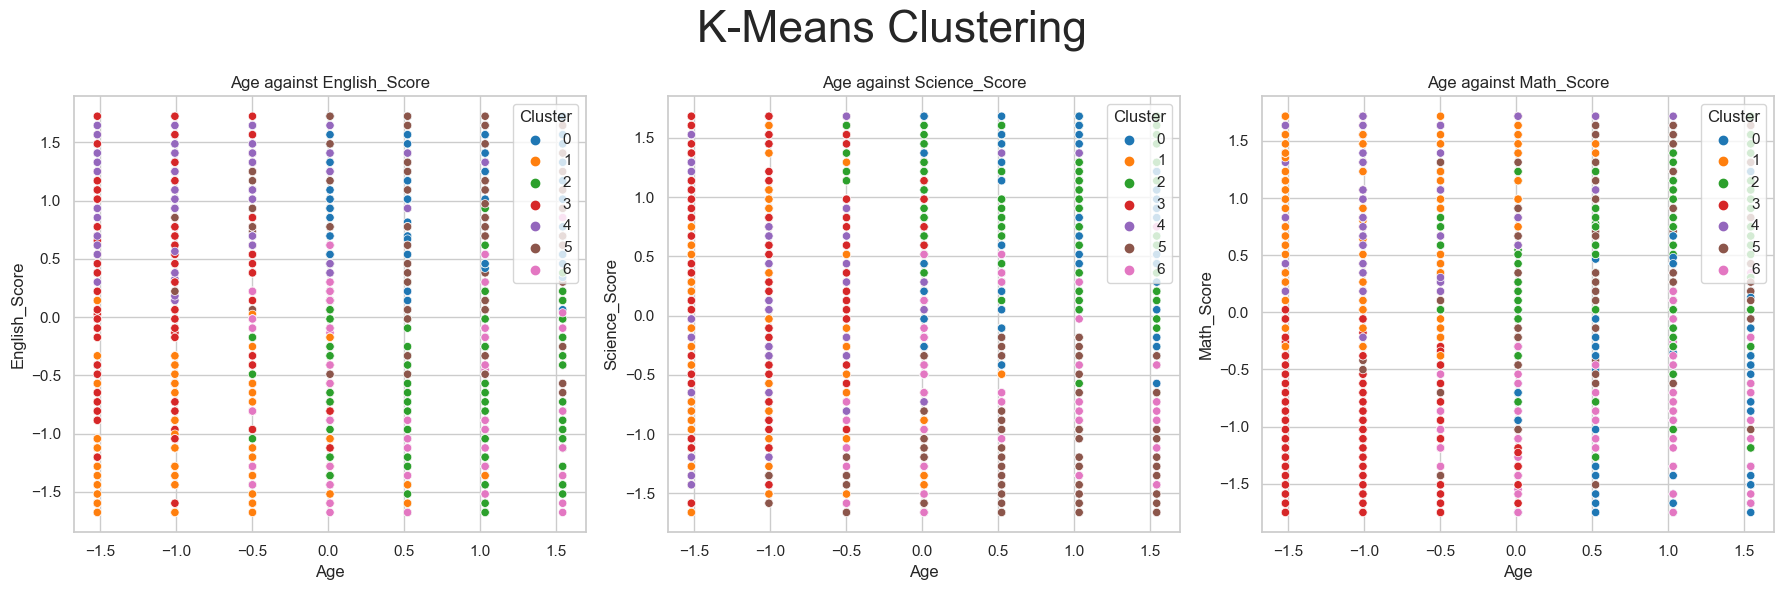

In [54]:
# Display the model in effect

# Print silhouette_score
print(f'Silhouette Score when k=8: {silhouette_score(df_no_categorical, df_kmeans["Cluster"])}')


# Plotting the cluster for English_Score, Science_Score, and Math_Score
plt.figure(figsize=(18, 6))
plt.suptitle('K-Means Clustering', fontsize=32)

# Plotting the cluster for English_Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='English_Score', hue=df_kmeans['Cluster'], palette='tab10', data=df_kmeans)
plt.title('Age against English_Score')
plt.xlabel('Age')
plt.ylabel('English_Score')

# Plotting the cluster for Science_Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Science_Score', hue=df_kmeans['Cluster'], palette='tab10', data=df_kmeans)
plt.title('Age against Science_Score')
plt.xlabel('Age')
plt.ylabel('Science_Score')

# Plotting the cluster for Math_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Math_Score', hue=df_kmeans['Cluster'], palette='tab10', data=df_kmeans)
plt.title('Age against Math_Score')
plt.xlabel('Age')
plt.ylabel('Math_Score')

plt.tight_layout()
plt.show()


<b><u>Observations</u></b>

<ul>
<li></li>
</ul>

<h4>Spectral Clustering</h4>
<hr></hr>
Spectral clustering partitions data using eigenvectors of an affinity matrix, capturing complex structures and handling non-convex shapes effectively.

Silhouette Score when k=8: 0.2115941953871465


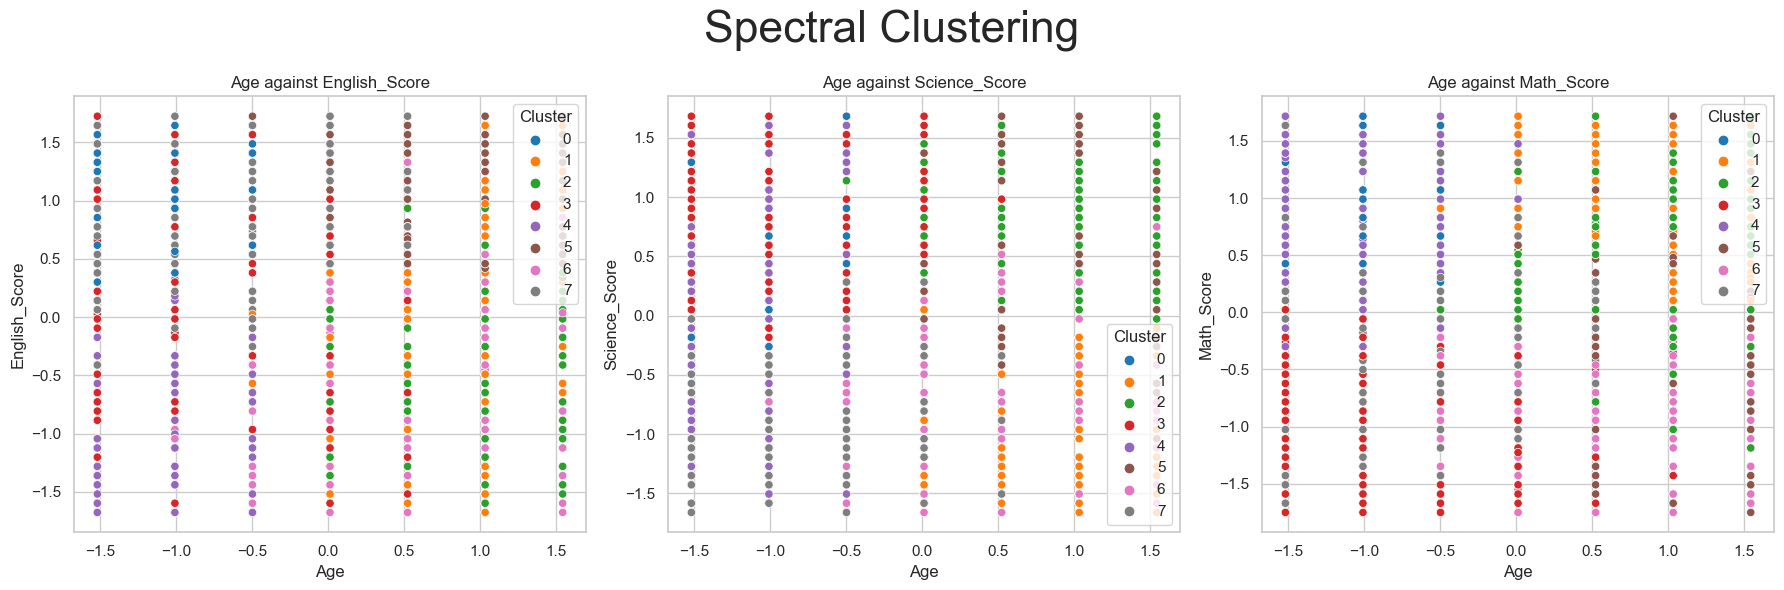

In [37]:
df_spec = df_no_categorical.copy()
spec = SpectralClustering(n_clusters=8)
df_spec["Cluster"] = spec.fit_predict(df_no_categorical)

print(f'Silhouette Score when k=8: {silhouette_score(df_no_categorical, df_spec["Cluster"])}')

# Plotting the cluster for English_Score, Science_Score, and Math_Score
plt.figure(figsize=(18, 6))
plt.suptitle('Spectral Clustering', fontsize=32)


# Plotting the cluster for English_Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='English_Score', hue=df_spec['Cluster'], palette='tab10', data=df_spec)
plt.title('Age against English_Score')
plt.xlabel('Age')
plt.ylabel('English_Score')

# Plotting the cluster for Science_Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Science_Score', hue=df_spec['Cluster'], palette='tab10', data=df_spec)
plt.title('Age against Science_Score')
plt.xlabel('Age')
plt.ylabel('Science_Score')

# Plotting the cluster for Math_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Math_Score', hue=df_spec['Cluster'], palette='tab10', data=df_spec)
plt.title('Age against Math_Score')
plt.xlabel('Age')
plt.ylabel('Math_Score')

plt.tight_layout()
plt.show()

<h4>Aggrolomative Clustering</h4>
<hr></hr>
Builds a hierarchy of clusters by either merging or splitting existing clusters based on their similarity.


Silhouette Score when k=8: 0.14226409179097288


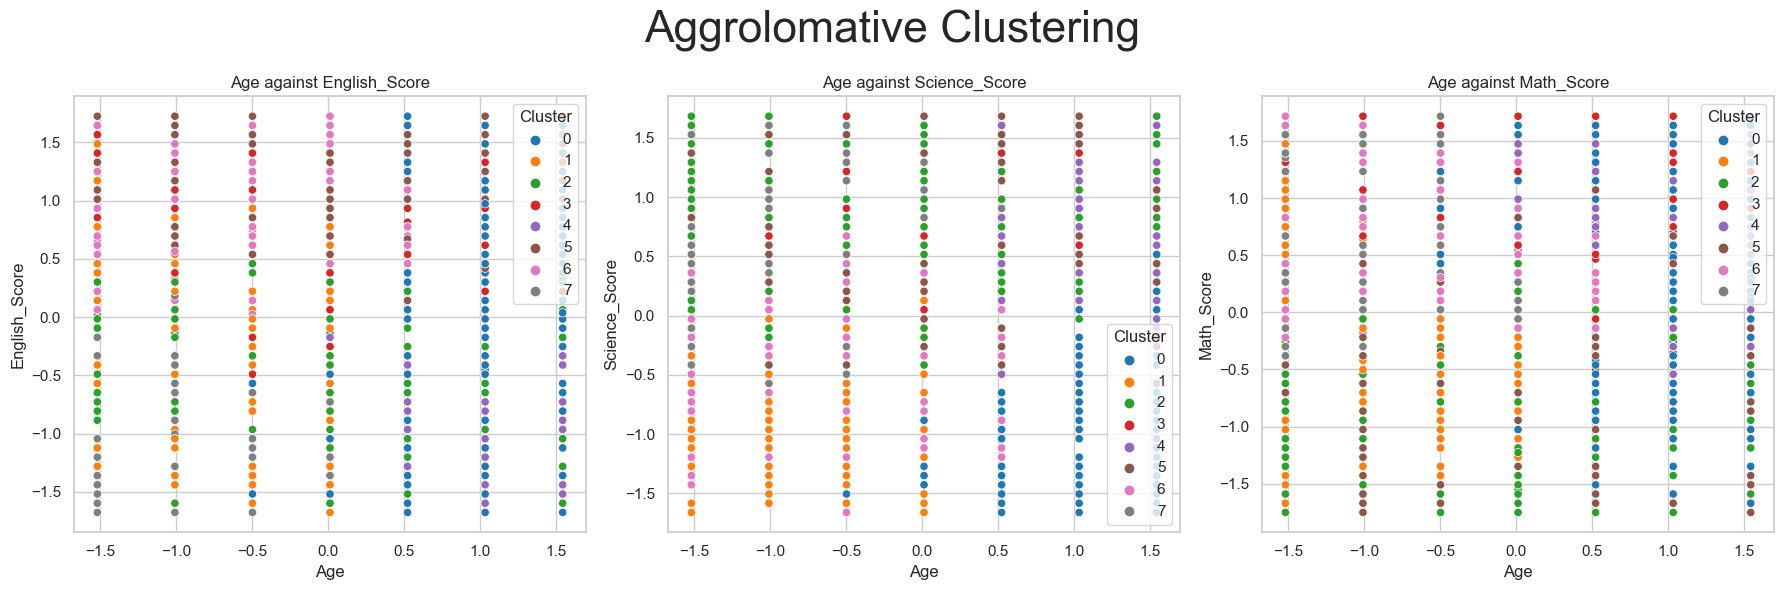

In [38]:
# Create copy of data
df_agg = df_no_categorical.copy()

agg = AgglomerativeClustering(n_clusters=8)

df_agg["Cluster"] = agg.fit_predict(df_no_categorical)

# Print silhouette_score
print(f'Silhouette Score when k=8: {silhouette_score(df_no_categorical, df_agg["Cluster"])}')


# Plotting the cluster for English_Score, Science_Score, and Math_Score
plt.figure(figsize=(18, 6))
plt.suptitle('Aggrolomative Clustering', fontsize=32)


# Plotting the cluster for English_Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='English_Score', hue=df_agg['Cluster'], palette='tab10', data=df_agg)
plt.title('Age against English_Score')
plt.xlabel('Age')
plt.ylabel('English_Score')

# Plotting the cluster for Science_Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Science_Score', hue=df_agg['Cluster'], palette='tab10', data=df_agg)
plt.title('Age against Science_Score')
plt.xlabel('Age')
plt.ylabel('Science_Score')

# Plotting the cluster for Math_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Math_Score', hue=df_agg['Cluster'], palette='tab10', data=df_agg)
plt.title('Age against Math_Score')
plt.xlabel('Age')
plt.ylabel('Math_Score')

plt.tight_layout()
plt.show()

<h4>DBSCAN </h4>
<hr></hr>
DBSCAN identifies clusters based on data density, robust to outliers.


Silhouette Score: -0.3587358817337824


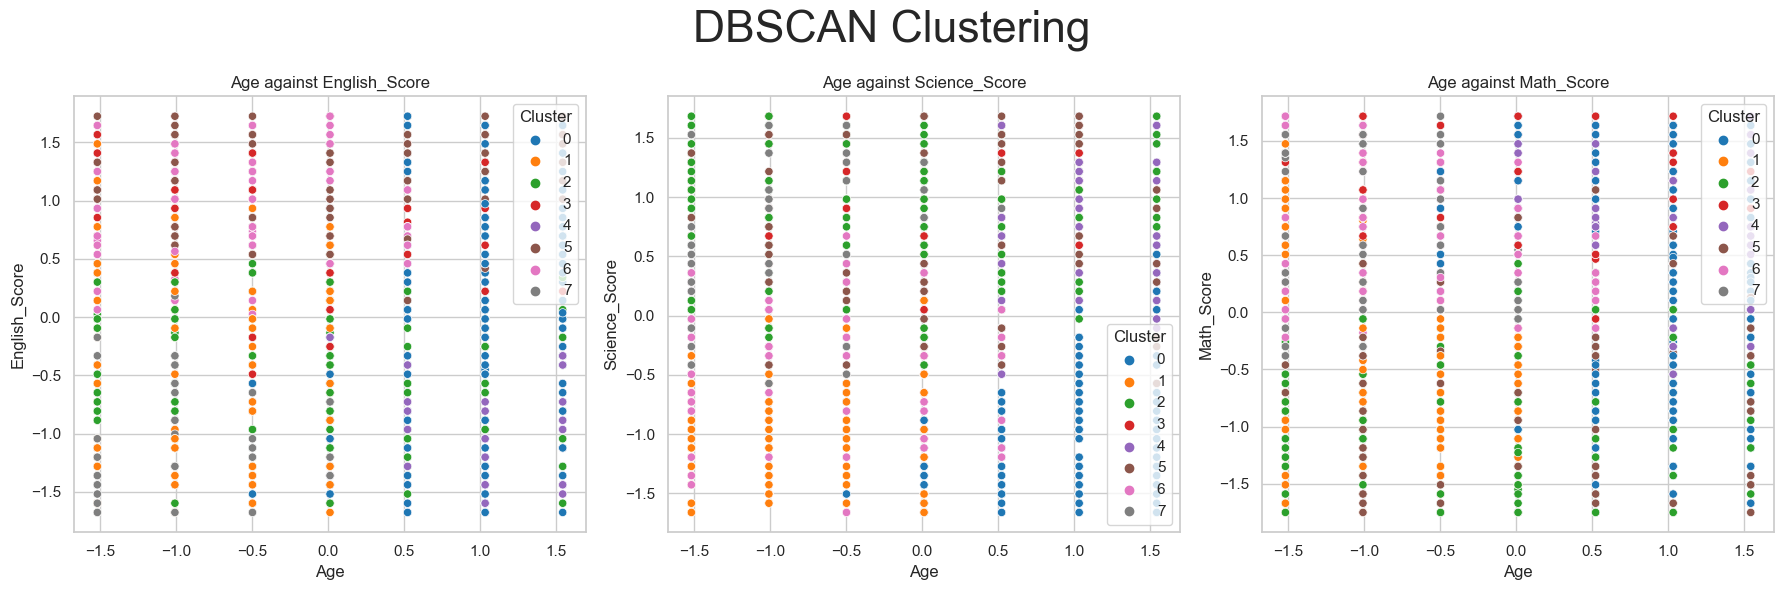

In [39]:
df_dbscan = df_no_categorical.copy()
model = DBSCAN()
df_dbscan["Cluster"] = model.fit_predict(df_no_categorical)

print(f'Silhouette Score: {silhouette_score(df_no_categorical, df_dbscan["Cluster"])}')

# Plotting the cluster for English_Score, Science_Score, and Math_Score
plt.figure(figsize=(18, 6))
plt.suptitle('DBSCAN Clustering', fontsize=32)


# Plotting the cluster for English_Score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='English_Score', hue=df_agg['Cluster'], palette='tab10', data=df_agg)
plt.title('Age against English_Score')
plt.xlabel('Age')
plt.ylabel('English_Score')

# Plotting the cluster for Science_Score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='Science_Score', hue=df_agg['Cluster'], palette='tab10', data=df_agg)
plt.title('Age against Science_Score')
plt.xlabel('Age')
plt.ylabel('Science_Score')

# Plotting the cluster for Math_Score
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Math_Score', hue=df_agg['Cluster'], palette='tab10', data=df_agg)
plt.title('Age against Math_Score')
plt.xlabel('Age')
plt.ylabel('Math_Score')

plt.tight_layout()
plt.show()

<h3>What is the BEST clustering model?</h3>
<hr></hr>

<ul>
<u>When k=8,</u>
<li><b>K-Means Clustering</b></li>
Silhouette Score: 0.23159313295707976


<li><b>Spectral Clustering</b></li>
Silhouette Score: 0.21181821141804028

<li><b>Aggrolomative Clustering</b></li>
Silhouette Score: 0.14226409179097288

<li><b>DBSCAN</b></li>
Silhouette Score: -0.3587358817337824

</ul>

As the <b>higher the silhouette score</b>, 

 the <b>more distinguishable are the datapoints</b>, 
 
Hence the best clustering model when <b>k=8</b> is the <b>K-Means Clustering Model</b> with the highest silhouette score of <b>0.23159313295707976</b>

In [40]:
cluster_centers = df_kmeans.groupby('Cluster').mean()
cluster_centers['Cluster Size (% of Total)'] = pd.Series(df_kmeans['Cluster']).value_counts() / len(df_kmeans['Cluster']) * 100

cluster_centers

,Age,English_Score,Math_Score,Science_Score,Cluster Size (% of Total)
Cluster,,,,,
0,-0.046689,0.867775,-0.083967,-0.157215,49.4
1,0.045582,-0.847195,0.081976,0.153487,50.6


<h4>Describe the characteristics of each student cluster</h4>
<hr></hr>

In [41]:
df['Cluster'] = df_kmeans['Cluster']

# Display the updated DataFrame
df.head(50)

,Gender,Age,English_Score,Math_Score,Science_Score,Cluster
Student_ID,,,,,,
1,Female,18,64.0,56.0,60,1
2,Female,12,89.0,71.0,97,0
3,Female,18,69.0,69.0,80,1
4,Female,17,60.0,72.0,97,1
5,Male,13,71.0,76.0,76,1
6,Female,12,83.0,61.0,60,0
7,Female,12,68.0,73.0,93,1
8,Female,18,84.0,84.0,79,0
9,Female,14,94.0,71.0,94,0


<h1><b>Still incomplete</b></h1>

<h4>Student Group Descriptions</h4>
<hr></hr>
There are 8 clusters in total for splitting students
<ol>
<li>
<b>Cluster 0: The Balanced Achievers</b>


This group consists of students who demonstrate a balanced performance across all subjects. While not the highest-scoring, they maintain a consistent level of achievement. The average age of this group is 12, and their scores in English, Math, and Science are well-distributed.
</li>
<li>
<b>Cluster 1: The Science and Math Scholars</b>


Students in this cluster excel in both Math and Science. With an average age of 15, they showcase a strong aptitude for STEM subjects. The cluster has a balanced gender distribution, indicating a diverse group of high-achieving students.
</li>
<li>
<b>Cluster 2: The English and Science Enthusiasts</b>


This group shows a particular interest in English and Science, with high scores in these subjects. The average age is 13, and there is a mix of male and female students contributing to this cluster.
</li>
<li>
<b>Cluster 3: The Varied Achievers</b>


This cluster represents students with diverse scores across English, Math, and Science. With an average age of 16, this group has a slightly higher proportion of females. Their scores vary, showcasing a mix of strengths in different subjects.
</li>
<li>
<b>Cluster 4: The Language and Arts Aficionados</b>


Students in this cluster demonstrate a strong inclination towards English and potentially arts-related subjects. With an average age of 12, this group has above-average scores in English. The majority are female, suggesting an interest in language and arts.
</li>
<li>
<b>Cluster 5: The Well-Rounded Scholars</b>


This group of students performs well across all subjects. With an average age of 14, they maintain above-average scores in English, Math, and Science. The gender distribution is balanced, indicating a well-rounded academic profile.
</li>
<li>
<b>Cluster 6: The Senior Achievers</b>


This cluster consists of older students (average age 17-18) who excel in English, Math, and Science. They showcase a strong academic foundation and a balanced gender distribution, indicating high-achieving seniors.
</li>
<li>
<b>Cluster 7: The Math and Science Experts</b>


This group comprises male students with high scores in Math and Science. With an average age of 16, these students demonstrate a particular strength in STEM subjects.
</li>

</ul>


<h4>Groups to pay more attention to </h4>
<hr></hr>
<h>Recommendations:</h>

- For <b>Cluster 2 and Cluster 4</b>, targeted interventions in Math can help address challenges and ensure a more well-rounded academic performance.


- Students belonging to <b>Cluster 3: The Varied Achievers</b> 

</ul>
